In [2]:


_PCVERSION_=True


if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/_EarthQuake/gpos_lin"
else:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    basedir="/content/drive/My Drive/001_AI/_EarthQuake/gpos_lin"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#--------------scikit import 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#--------------

def outlierStatistic(X_train_predict):
    print(X_train_predict)
    maxX=len(X_train_predict)
    outlier=0
    for i in X_train_predict:
        if i==-1:
            outlier+=1
    print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")


def checkvalues(df,columnname,key):
    print(f"{columnname} ellenőrzése !")
    numok=0
    numerr=0
    for i in df.index:
        if df.at[i,columnname] in key:
            #print(df.at[i,columnname])
            numok+=1
            pass
        else:
            numerr+=1
            print(df.at[i,columnname],end=", ")
    sumall=numok+numerr
    print(f"\n{sumall} mintából {numerr} db nem volt megfelelő")


def createcolumn(df,columnname,keys):
    print(f"{columnname} cseréje megy")
    for key in keys:
        df[keys[key]]=0.0
    for key in keys:
        for i in df.index:
            if df.at[i,columnname]==key:
                df.at[i,keys[key]]=1.0


def create_dict(idx,list):
    o={}
    for i in list:
        o[i]=idx+"_"+i
    return o

def create_base_data(df):
    t=['n', 't', 'o']
    columnname="land_surface_condition"
    key=create_dict(columnname,t)


    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t= ['h', 'w', 'i', 'r', 'u']
    columnname="foundation_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=  ['q', 'n', 'x']
    columnname="roof_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=  ['z', 'v', 'f', 'm', 'x']
    columnname="ground_floor_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['q', 's', 'j', 'x']
    columnname="other_floor_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['j', 's', 't', 'o']
    columnname="position"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['c', 's', 'f', 'd', 'm', 'a', 'q', 'u', 'n', 'o']
    columnname="plan_configuration"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=['a', 'w', 'r', 'v']
    columnname="legal_ownership_status"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    # level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    # level1:0--30
    # level2: 0.0000-----------0.9999
    # level3: 0.000000000------0.000099999
    l1=df.geo_level_1_id
    l2=(df.geo_level_2_id/1427*9999)/10000
    l3=(df.geo_level_2_id/12567*99999)/1000000000
    df["geopos"]=l1+l2+l3
    return(df)



def kill_columns(df):
    notkey=["Unnamed: 0","building_id","legal_ownership_status","geo_level_1_id",	"geo_level_2_id",	"geo_level_3_id", "land_surface_condition",	"foundation_type",	"roof_type",	"ground_floor_type",	"other_floor_type",	"position",	"plan_configuration"]
    for i in df.columns:
        #print(i)
        if i in notkey:
            df.drop(columns=[i], inplace=True)
    return df







In [3]:
def check_similarity_np(np1,np2):
    db=0
    maxi=0
    for ind, i1 in enumerate(np1):
        maxi+=1
        i2=np2[ind]
        if i1!=i2:
            db+=1
    #print(f"{ind}. eset:  {i:3},{i2:3}")
    print(f"hiba:{db} max:{maxi} -- error:{db/maxi*100.0 : 2.6} good %:{100-db/maxi*100.0 : 2.6} %")

In [4]:
def outlierDropfrom_df(df,inxlist):
    a=df
    out=a.drop(inxlist,axis=0)
    return(out)

In [5]:
def outlierDropfrom_numpyarray(na,inxlist):
    
    out=np.delete (na ,inxlist, axis=0)
    return(out)

In [6]:

features_train=basedir+"/orig/train_values.csv"
labels_train=basedir+"/orig/train_labels.csv"
features_predict=basedir+"/orig/test_values.csv"

X_train=pd.read_csv(features_train)
y_train=pd.read_csv(labels_train)
X_pred=pd.read_csv(features_predict)
#
X_pred_conv=create_base_data(X_pred)
X_train_conv=create_base_data(X_train)
#
X_train_ok=kill_columns(X_train_conv)
X_pred_ok=kill_columns(X_pred_conv)
y_train_ok=kill_columns(y_train)

X_train_ok.to_csv(basedir+"/tmp/X_tran_ok.csv",index=False)
X_pred_ok.to_csv(basedir+"/tmp/X_pred_ok.csv",index=False)
y_train_ok.to_csv(basedir+"/tmp/y_train_ok.csv",index=False)




#f=open(basedir+"/tmp/similarity.csv","a")
X_train_ok=pd.read_csv(basedir+"/tmp/X_tran_ok.csv",)
X_pred_ok=pd.read_csv(basedir+"/tmp/X_pred_ok.csv")
y_train_ok=pd.read_csv(basedir+"/tmp/y_train_ok.csv")

X_train_ok.head()
X_pred_ok.head()
#print("Ready")


land_surface_condition cseréje megy
foundation_type cseréje megy
roof_type cseréje megy
ground_floor_type cseréje megy
other_floor_type cseréje megy
position cseréje megy
plan_configuration cseréje megy
legal_ownership_status cseréje megy
land_surface_condition cseréje megy
foundation_type cseréje megy
roof_type cseréje megy
ground_floor_type cseréje megy
other_floor_type cseréje megy
position cseréje megy
plan_configuration cseréje megy
legal_ownership_status cseréje megy


,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,plan_configuration_a,plan_configuration_q,plan_configuration_u,plan_configuration_n,plan_configuration_o,legal_ownership_status_a,legal_ownership_status_w,legal_ownership_status_r,legal_ownership_status_v,geopos
0,3,20,7,6,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.417622
1,2,25,13,5,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.098800
2,2,5,4,5,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.013313
3,1,0,19,3,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.027328
4,3,15,8,7,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.202505


In [7]:
X_pred_ok=kill_columns(X_pred_ok)
X_train_ok=kill_columns(X_train_ok)
y_train_ok=kill_columns(y_train_ok)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler1=StandardScaler()
X_pred_scale=scaler1.fit_transform(X_pred_ok)

scaler2=StandardScaler()
X_train_scale=scaler2.fit_transform(X_train_ok)
"""
scaler3=StandardScaler()
y_train_scale=scaler3.fit_transform(y_train_ok)
"""
y_train_np=y_train_ok.to_numpy()

# szétszedjük a train és test részekre
from sklearn.model_selection import train_test_split
#X_train_train, X_train_test,y_train_train, y_train_test  = train_test_split( X_train_scale, y_train_scale, test_size=0.10, random_state=0)
X_train_train, X_train_test,y_train_train, y_train_test  = train_test_split( X_train_scale, y_train_np, test_size=0.10, random_state=0)




Help on package pyclustertend:

NAME
    pyclustertend - # -*- coding: utf-8 -*-

PACKAGE CONTENTS
    hopkins
    metric
    version
    visual_assessment_of_tendency

DATA
    name = 'pyclustertend'

FILE
    c:\users\sipocz\appdata\local\programs\python\python38\lib\site-packages\pyclustertend\__init__.py




0.10501933290798514

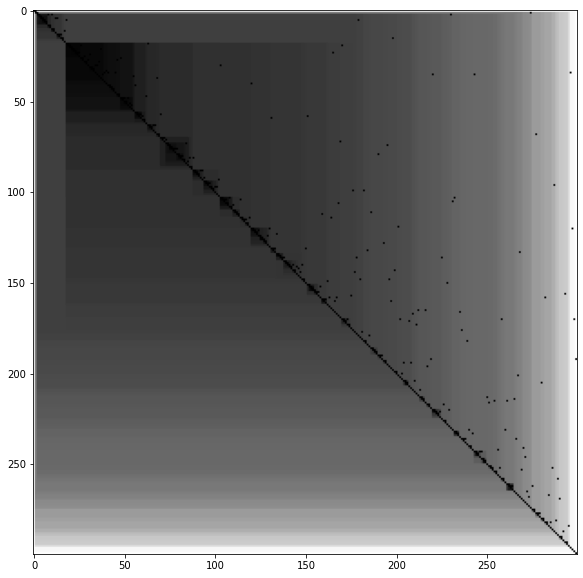

In [9]:
from sklearn import datasets
from pyclustertend import ivat
from pyclustertend import assess_tendency_by_metric as atm
import pyclustertend
from sklearn.preprocessing import scale
X = scale(X_train_scale[19000:19300])
ivat(X)
atm(X)
help(pyclustertend)

from pyclustertend import hopkins
hopkins(X,100)


In [10]:
'''
# K-means próba 45-nél van egy törés a görbében. Ezt fogjuk továbbvinni
from sklearn.cluster import KMeans
labnum=[]
dist=[]
for cnum in range(10,80):
    km = KMeans(n_clusters=cnum)
    print("#_",end="")
    km.fit(X_train_scale)
    km.predict(X_train_scale[0:5000])
    #labelnum=km.n_clusters
    labnum.append(cnum)
    dist.append(km.inertia_)
plt.figure(figsize=(16,8))
plt.plot(labnum, dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-10-7c1e71e5c6ea>, line 19)

In [107]:
print((X_train_ok.view()))

AttributeError: 'DataFrame' object has no attribute 'view'

In [82]:
#pakoljuk bele a damage-et is a listába
print(X_train_scale.shape)
y_train_np=y_train_ok.damage_grade.to_numpy().reshape(260601,1)
print(y_train_np.shape)

X_np_all=np.concatenate((X_train_scale,y_train_np),axis=1)
print(X_np_all.shape)


(260601, 66)
(260601, 1)
(260601, 67)


In [33]:
from sklearn.cluster import DBSCAN
cnum=45 # ez jött ki az előző tesztből
km = DBSCAN(eps=5)
print("DBSCAN fitting start:")
km.fit(X_train_scale[0000:10000])  # km.fit(X_train_scale)
print("DBSCAN prediction start:")
#km.fit(X_train_ok) #km.predict(X_train_scale)
list(km.labels_).count(-1)

DBSCAN fitting start:
DBSCAN prediction start:


1093

In [37]:
# Statisztaki kell a km_labels és a y_train_ok közé
a=[0,0,0,0]
kmcluster_list=[]
for i in range(max(km.labels_)+1):
    kmcluster_list.append([0,0,0,0,0])
print(kmcluster_list) 

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [38]:

for inx,km_cluster in enumerate(km.labels_):
    #print(inx,km_cluster)
    ind2=y_train_ok.damage_grade[inx]
    #print(km_cluster,":",inx,":",ind2," - ", end="")
    res=kmcluster_list[km_cluster][ind2]+1
    kmcluster_list[km_cluster][ind2]=res
    if inx%1000==0:
        pass
        #print(inx,"\n",kmcluster_list)
print(kmcluster_list)

[[0, 289, 3449, 2401, 0], [0, 12, 120, 78, 0], [0, 12, 293, 155, 0], [0, 30, 19, 0, 0], [0, 2, 7, 0, 0], [0, 4, 95, 108, 0], [0, 60, 138, 35, 0], [0, 101, 214, 33, 0], [0, 16, 7, 0, 0], [0, 5, 39, 20, 0], [0, 2, 8, 13, 0], [0, 0, 31, 17, 0], [0, 2, 23, 4, 0], [0, 7, 156, 88, 0], [0, 0, 6, 0, 0], [0, 0, 42, 53, 0], [0, 1, 28, 35, 0], [0, 4, 36, 25, 0], [0, 2, 10, 2, 0], [0, 8, 6, 0, 0], [0, 3, 20, 13, 0], [0, 12, 50, 3, 0], [0, 7, 7, 0, 0], [0, 23, 7, 1, 0], [0, 9, 2, 0, 0], [0, 18, 10, 0, 0], [0, 0, 18, 4, 0], [0, 32, 26, 2, 0], [0, 12, 18, 2, 0], [0, 9, 7, 0, 0], [0, 4, 4, 0, 0], [0, 4, 4, 1, 0], [0, 0, 1, 6, 0], [0, 1, 37, 9, 0], [0, 0, 9, 2, 0], [0, 5, 22, 0, 0], [0, 7, 2, 0, 0], [0, 6, 8, 9, 0], [0, 0, 2, 4, 0], [0, 5, 1, 0, 0], [0, 3, 2, 0, 0], [0, 0, 5, 4, 0], [0, 3, 1, 0, 0], [0, 1, 7, 2, 0], [0, 4, 2, 0, 0], [0, 0, 5, 2, 0], [0, 0, 3, 1, 0], [0, 1, 4, 1, 0], [0, 1, 2, 2, 0], [0, 1, 3, 1, 0], [0, 0, 4, 3, 0], [0, 0, 3, 2, 0], [0, 1, 2, 2, 0], [0, 1, 3, 1, 0], [0, 236, 650, 212, 

In [56]:
kmcluster_list[1][2]=5
print(kmcluster_list[3][2])

5


In [19]:
# XGBClassifier

from xgboost import XGBClassifier  # 72.09
# max_depth=10 : 72.79857561664441

XGB = XGBClassifier(verbosity=3,max_depth = 13,n_estimators=100,loss="deviance", criterion="mae")

print("Fit: Inlier betanitás Start--")

XGB.fit(km.labels_, y_train_ok)

print("Fit End - Prediction Start ")


Fit: Inlier betanitás Start--


ValueError: Please reshape the input data X into 2-dimensional matrix.

In [ ]:
print(y_train_train_out)

In [ ]:
# test the traing
#------------------------------------

y_pred_train=knn.predict(X_train_train)

#------------------------------------

In [ ]:
check_similarity_np(y_pred_train,y_train_train)

In [ ]:
# the prediction
#------------------------------------

y_pred_test=knn.predict(X_test_lda)

#------------------------------------

In [ ]:
check_similarity_np(y_pred_test,y_train_test)

In [ ]:
# futtass ez felett !!

In [ ]:
#outfile generation
y_pred_ok=knn.predict(X_pred_ok)
print("Prediction End")

X_pred_bd=pd.read_csv(basedir+"/orig/test_values.csv")

y_pred_ok_int=[]
for i in range(len(y_pred_ok)):
    y_pred_ok_int.append(int(y_pred_ok[i]))

In [ ]:
buildingid=X_pred_bd["building_id"]
head2=y_pred_ok_int


outdf=pd.DataFrame(data={"damage_grade":y_pred_ok_int} ,index=buildingid)
outdf.index.name="building_id"


outdf.head()
st=24
sts=str(st)
outdf.to_csv(basedir+"/out/submission_"+sts+"_xgboost.csv")
print()
print(basedir+"/out/submission_"+sts+"_xgboost.csv")

In [ ]:
if not( _PCVERSION_):
    !head "/content/drive/My Drive/001_AI/_EarthQuake/gpos_lin/out/submission_24_xgboost.csv"